In [27]:
import matplotlib.pyplot as plt
import os
height = 10
width = height*0.6
plt.rcParams["figure.figsize"] = (height,width)
import numpy as np
plt.style.use('seaborn-colorblind')

# Dataset = "CIFAR10/"
Dataset = "CIFAR100/"
# Dataset = "MNIST/"

figure_directory = "../trained-models/ResNet18/"+Dataset


try:
    os.mkdir(figure_directory + 'figures/')
    print('Figure Folder Created..')
except FileExistsError:
    print('Figure Folder Exists..')
        

Figure Folder Exists..


In [22]:
def get_mean_std(values):
    
    means = np.mean(values,axis=0)
    stds = np.std(values,axis=0)
    
    return means,stds 

In [35]:
train_accuracy = []
val_accuracy = []
train_losses = []
val_losses = []
branch_weights = []
checkpoint_metrics = []

runs = ['CIFAR100-test','CIFAR100-ADAM','CIFAR100-SGDR']


for run in runs:
    target_directory = figure_directory+run+"/metrics/"

    train_accuracy.append(np.load(target_directory+"train-accuracy-ResNet18.npy"))
    val_accuracy.append(np.load(target_directory+"val-accuracy-ResNet18.npy"))
    train_losses.append(np.load(target_directory+"train-losses-ResNet18.npy"))
    val_losses.append(np.load(target_directory+"val-losses-ResNet18.npy"))
    
    checkpoint_metrics.append(np.load(target_directory+"checkpoint-metrics-ResNet18.npy"))

print(val_losses[0].shape)
print(train_losses[0].shape)

print(train_accuracy[0].shape)
print(val_accuracy[0].shape)
print(train_losses[0].shape)
print(val_losses[0].shape)

n_epochs = 300

epochs = np.arange(0,n_epochs)

(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)


In [36]:
std_train_accuracy = []
std_val_accuracy = []
std_train_losses = []
std_val_losses = []

mean_train_accuracy = []
mean_val_accuracy = []
mean_train_losses = []
mean_val_losses = []

for run in range(len(train_accuracy)):
    mean_train_acc,std_train_acc = get_mean_std(train_accuracy[run])
    mean_val_acc,std_val_acc = get_mean_std(val_accuracy[run])
    mean_train_loss,std_train_loss = get_mean_std(train_losses[run])
    mean_val_loss,std_val_loss = get_mean_std(val_losses[run])
    
    std_train_accuracy.append(std_train_acc[:n_epochs])
    std_val_accuracy.append(std_val_acc[:n_epochs])
    std_train_losses.append(std_train_loss[:n_epochs])
    std_val_losses.append(std_val_loss[:n_epochs])

    mean_train_accuracy.append(mean_train_acc[:n_epochs])
    mean_val_accuracy.append(mean_val_acc[:n_epochs])
    mean_train_losses.append(mean_train_loss[:n_epochs])
    mean_val_losses.append(mean_val_loss[:n_epochs])

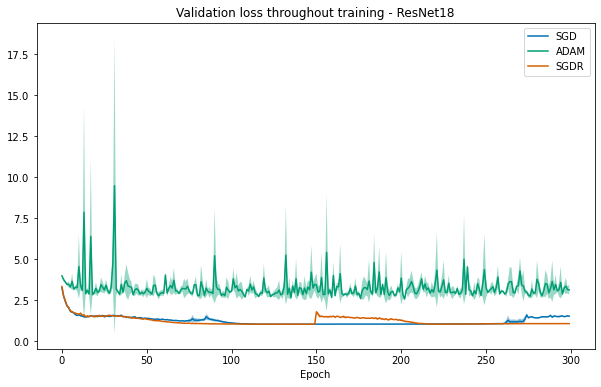

In [37]:
optimisers = ['SGD','ADAM','SGDR']
plt.title("Validation loss throughout training - ResNet18")
for i in range(len(runs)):
    plt.plot(epochs, mean_val_losses[i],label=optimisers[i])
    plt.fill_between(epochs, mean_val_losses[i]+std_val_losses[i], mean_val_losses[i]-std_val_losses[i],alpha=0.4)
#     plt.plot(epochs, mean_train_losses[i],label='Training')
#     plt.fill_between(epochs, mean_train_losses[i]+std_train_losses[i], mean_train_losses[i]-std_train_losses[i],alpha=0.4)
    
plt.xlabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.savefig(figure_directory+'figures/total-model-loss.pdf', bbox_inches = 'tight')
plt.show()


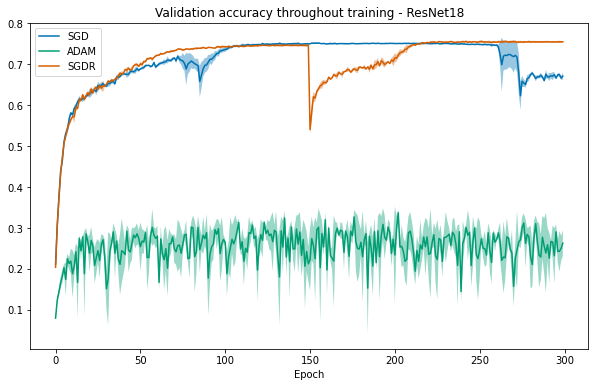

In [38]:
plt.title("Validation accuracy throughout training - ResNet18")
for i in range(len(runs)):
    plt.plot(epochs, mean_val_accuracy[i],label=optimisers[i])
    plt.fill_between(epochs, mean_val_accuracy[i]+std_val_accuracy[i], mean_val_accuracy[i]-std_val_accuracy[i],alpha=0.4)
#     plt.plot(epochs, mean_train_accuracy[i],label='Training')
#     plt.fill_between(epochs, mean_train_accuracy[i]+std_train_accuracy[i], mean_train_accuracy[i]-std_train_accuracy[i],alpha=0.4)
    
plt.xlabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.savefig(figure_directory+'figures/model-accuracy.pdf', bbox_inches = 'tight')
plt.show()